In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights -O weights/yolov3.weights

--2021-12-30 09:13:35--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘weights/yolov3.weights’

weights/yolov3.weig 100%[===================>] 236.52M  62.9MB/s    in 4.0s    

2021-12-30 09:13:40 (59.1 MB/s) - ‘weights/yolov3.weights’ saved [248007048/248007048]



In [ ]:
!python convert.py --weights weights/yolov3.weights --output weights/yolov3.tf

2021-12-30 09:16:48.177254: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Model: "yolov3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 yolo_darknet (Functional)      ((None, None, None,  40620640    ['input_1[0][0]']                
                                 256),                                                            
                                 (None, None, None,                      

In [ ]:
import time
from absl import app, flags, logging
from absl.flags import FLAGS
import cv2
import numpy as np
import tensorflow as tf
from models import YoloV3
from utils import draw_outputs, transform_images
import matplotlib.pyplot as plt

CLASSES_PATH = './coco.names'
WEIGHTS_PATH = './weights/yolov3.tf'
IMAGE_SIZE = 416

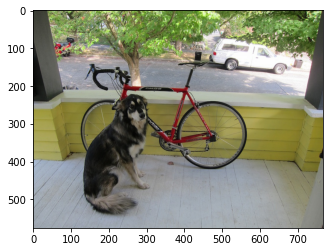

In [ ]:
yolo = YoloV3()
yolo.load_weights(WEIGHTS_PATH)
class_names = [c.strip() for c in open(CLASSES_PATH).readlines()]

img = tf.image.decode_image(open('./dog_example.jpg', 'rb').read(), channels=3)
plt.imshow(img)
plt.show()

input_img = tf.expand_dims(img, 0)
input_img = transform_images(input_img, IMAGE_SIZE)

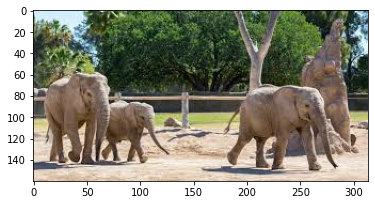

	elephant, 0.8188367486000061, [0.5763897  0.43708047 0.91406524 0.9341723 ]


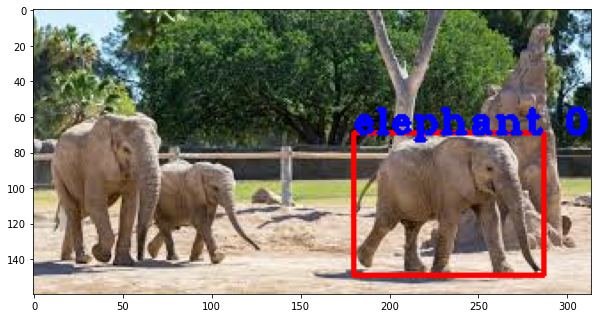

In [ ]:
img = tf.image.decode_image(open('./abc.jpeg', 'rb').read(), channels=3)
plt.imshow(img)
plt.show()

input_img = tf.expand_dims(img, 0)
input_img = transform_images(input_img, IMAGE_SIZE)

boxes, scores, classes, nums = yolo(input_img)


logging.info('detections:')
for i in range(nums[0]):
    print('\t{}, {}, {}'.format(class_names[int(classes[0][i])],
                                       np.array(scores[0][i]),
                                       np.array(boxes[0][i])))

prediction_img = draw_outputs(img.numpy(), (boxes, scores, classes, nums), class_names)
plt.figure(figsize=(10, 20))
plt.imshow(prediction_img)

	dog, 0.9977410435676575, [0.15920371 0.3862182  0.41723305 0.9451945 ]
	bicycle, 0.9901672601699829, [0.15322667 0.21770424 0.74125427 0.7511743 ]
	truck, 0.9378405213356018, [0.6156051  0.1511957  0.9018891  0.28910384]


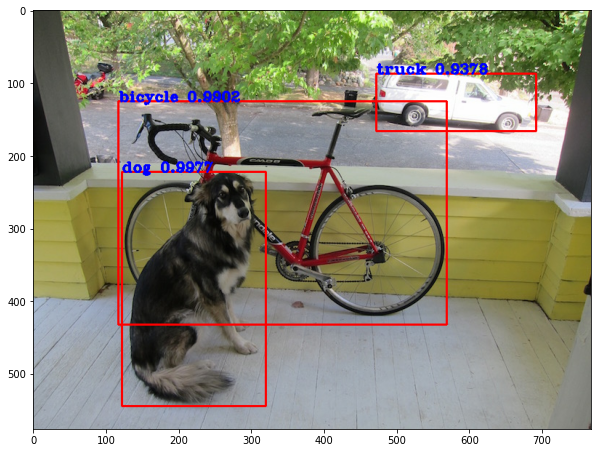

In [ ]:
boxes, scores, classes, nums = yolo(input_img)


logging.info('detections:')
for i in range(nums[0]):
    print('\t{}, {}, {}'.format(class_names[int(classes[0][i])],
                                       np.array(scores[0][i]),
                                       np.array(boxes[0][i])))

prediction_img = draw_outputs(img.numpy(), (boxes, scores, classes, nums), class_names)
plt.figure(figsize=(10, 20))
plt.imshow(prediction_img)

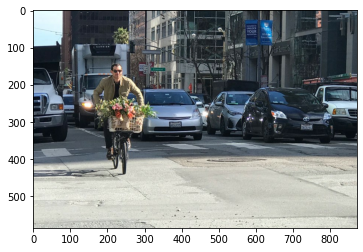

In [ ]:
img = tf.image.decode_image(open('/content/pic2.jpeg', 'rb').read(), channels=3)
plt.imshow(img)
plt.show()

input_img = tf.expand_dims(img, 0)
input_img = transform_images(input_img, IMAGE_SIZE)

	car, 0.9985274076461792, [0.326416   0.35450447 0.5343001  0.60239387]
	car, 0.9978354573249817, [0.6450198 0.3473879 0.936202  0.6069416]
	car, 0.9962791204452515, [0.5323789  0.3684023  0.67484283 0.5784647 ]
	person, 0.9415898323059082, [0.1772191  0.2592625  0.33575833 0.6335563 ]
	car, 0.8330334424972534, [0.8699692 0.3491419 0.9958592 0.5879601]
	car, 0.8189932107925415, [0.00137307 0.27129784 0.10713471 0.604916  ]
	car, 0.7930271029472351, [0.48386422 0.38402066 0.5470226  0.51395446]
	bicycle, 0.6373099088668823, [0.22367242 0.5100086  0.3356069  0.757982  ]
	car, 0.5163251757621765, [0.11852296 0.28384164 0.23399574 0.5292659 ]
	truck, 0.5109180212020874, [0.11852296 0.28384164 0.23399574 0.5292659 ]


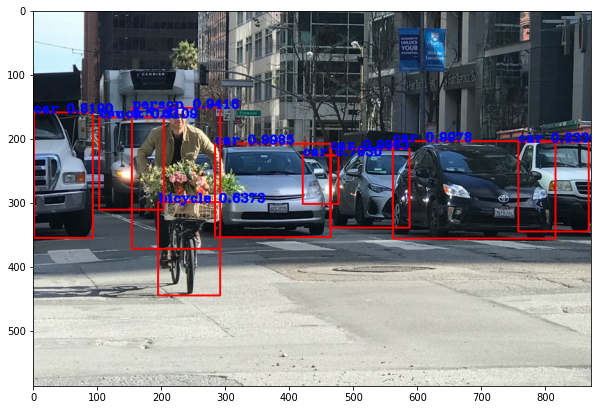

In [ ]:
boxes, scores, classes, nums = yolo(input_img)


logging.info('detections:')
for i in range(nums[0]):
    print('\t{}, {}, {}'.format(class_names[int(classes[0][i])],
                                       np.array(scores[0][i]),
                                       np.array(boxes[0][i])))

prediction_img = draw_outputs(img.numpy(), (boxes, scores, classes, nums), class_names)
plt.figure(figsize=(10, 20))
plt.imshow(prediction_img)

In [ ]:
boxes, scores, classes, nums = yolo(input_img)


logging.info('detections:')
for i in range(nums[0]):
    print('\t{}, {}, {}'.format(class_names[int(classes[0][i])],
                                       np.array(scores[0][i]),
                                       np.array(boxes[0][i])))

prediction_img = draw_outputs(img.numpy(), (boxes, scores, classes, nums), class_names)
plt.figure(figsize=(10, 20))
plt.imshow(prediction_img)